In [179]:
import numpy as np
import matplotlib.pyplot as plt

kappa = 5e6 * 2 * np.pi
geff = 1e6 * 2 * np.pi

G = 1 + (4* kappa**2 * geff**2 )

In [180]:
from gpu_odes.sim import Sim
# import gpu_odes.HatGPUODE_D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib inline

In [201]:
pi = np.pi

sim = Sim(use_complex=True)

input_power_dBm = -120
power = 1e-3 * 10 ** (input_power_dBm/10)
hbar = 6.62e-34/(2*np.pi)
wa = 4.0e9*2*pi
sqrtka = np.sqrt(5.0e7*2*pi)

amplR = np.sqrt(power / (hbar*wa))

steady_state_nbar = 4*amplR**2/sqrtka**2

print(steady_state_nbar)

sim.add_param('wa', wa, is_excitation=True)
sim.add_param('sqrtka', sqrtka)
sim.add_param('g3', 50e6 * 2 * np.pi)
sim.add_param('g4', 0.0e6 * 2 * np.pi)

sim.add_param('amplR',  amplR/2)
sim.add_param('amplG', 0.01/2)
sim.add_param('wR', wa)
sim.add_paramsweep('wG', wa*1.9, wa*2.1, 100)

sim.add_param('rampR', 1e-9)
sim.add_param('rampG', 1e-9) 
sim.add_param('startR', 50e-9)
sim.add_param('stopR', 350e-9)
sim.add_param('startG', 10e-9)  
sim.add_param('stopG', 350e-9)
sim.add_param('phaseR', 0) 
sim.add_param('phaseG', np.pi/2)

Rpulse = sim.make_pulse('wR', 'amplR', 'phaseR', 'startR', 'stopR', 'rampR')
Gpulse = sim.make_pulse('wG', 'amplG', 'phaseG', 'startG', 'stopG', 'rampG')

sim.add_EOM('sG', Gpulse)
sim.add_EOM('ain', Rpulse)
sim.add_EOM('a', '-1j*wa*a - ain*sqrtka - (sqrtka**2/2)*a - 1j*a*g4*abs(a)**2 + 1j*g3*conjugate(a)*sG')

sim.set_solve_type('decimate')

sim.specify_time(20, 1000, d_factor=1)

sim.validate()

4.80830643782161
Simulation validation success!


Simulation validation success!
Running CPU quick solve...
...finished CPU quick solve!


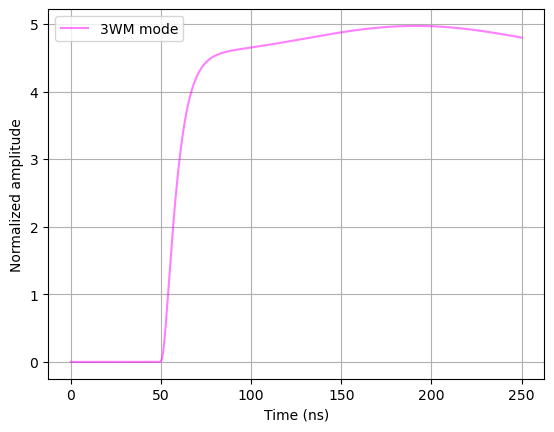

In [202]:
# sim.param_dict_nosweep['logchi'] = 6

x, t = sim.quick_trace()

plt.figure(1)
plt.clf()
# plt.plot(t*1e9, x[0,:]/np.max(x[0,:]),color=(1,0,0,0.7),label='3WM drive')
# plt.plot(t*1e9, x[2,:]/np.max(x[2,:])+2,color=(0,1,0,0.5),label='resonator drive')
# plt.plot(t*1e9, x[4,:]/np.max(x[4,:])+4,color=(0.3,0.3,0.3,0.5),label='gain drive')
plt.plot(t*1e9, np.abs(x[4,:]+x[5,:]*1j)**2,color=(1,0,1,0.5),label='3WM mode')
plt.xlabel('Time (ns)')
plt.ylabel('Normalized amplitude')
plt.legend()
plt.grid()
plt.show()


In [203]:
I, Q, t = sim.solve()

Simulation validation success!
Running GPU solve...


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:11<00:00, 1673.66it/s]

 
...finished GPU solve!


In [204]:
Id = I.copy()
Qd = Q.copy()
td = t.copy()

In [205]:
a_nbar = np.abs(Id[4,:]+Qd[5,:]*1j)**2

wG = sim.paramsweep_dict['wG']

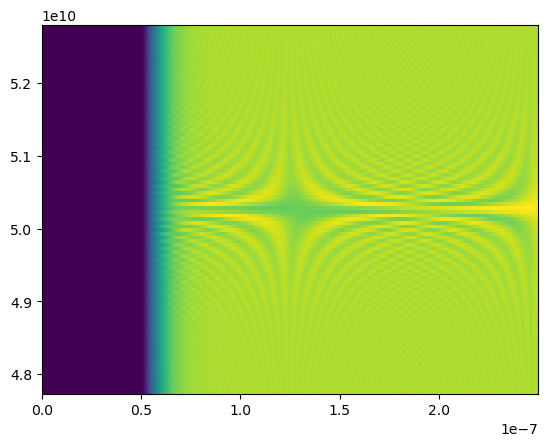

In [206]:
plt.pcolor(t, wG, a_nbar)
plt.show()